# Neural Network Implementation using tensorflow - MNIST Fashion dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()
# xtrain = collection of 60000 images of shape 28x28, ytrain = corresponding labels for xtrain
# xtest = collection of 10000 images of shape 28x28, ytest = corresponding labels for xtest
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
cnames = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

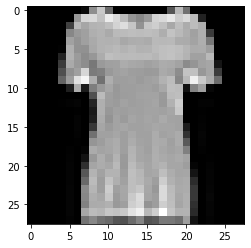

In [6]:
plt.imshow(xtrain[10],cmap='gray')
plt.show()

In [7]:
print(ytrain[10])
cnames[ytrain[10]]

0


'T-shirt/top'

## Preprocessing

In [ ]:
# images = 28x28
# number of neurons on input layer = 28*28 = 784
# number of neurons on output layer = 10

In [10]:
# onehot encode the labels
from tensorflow.keras.utils import to_categorical
print(ytrain.shape)
print(ytest.shape)
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
print(ytrain.shape)
print(ytest.shape)


(60000,)
(10000,)
(60000, 10)
(10000, 10)


## MOdelling the Neural Network using Tensorflow

In [11]:
from tensorflow.keras import models,layers

In [12]:
# program the neural network
input_layer = layers.Input(shape=(28,28))

# add the flatten layer to convert the 28x28 into 1x784
flatten = layers.Flatten()(input_layer)

# add the first hidden layer - fully connected layer
fc1 = layers.Dense(300,activation='relu')(flatten)

# add another hidden layer - fully connected layer
fc2 = layers.Dense(100,activation='relu')(fc1)

# add output layer
output_layer = layers.Dense(10,activation='softmax')(fc2)

# building the final model
model = models.Model(inputs=input_layer,outputs=output_layer)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(xtrain,ytrain,epochs=10,batch_size=1000,validation_data=(xtest,ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/sample - loss: 18.6735 - accuracy: 0.6477 - val_loss: 3.6550 - val_accuracy: 0.7513
Epoch 2/10
60000/60000 [==============================] - 1s 18us/sample - loss: 2.8491 - accuracy: 0.7746 - val_loss: 2.5310 - val_accuracy: 0.7816
Epoch 3/10
60000/60000 [==============================] - 1s 18us/sample - loss: 2.0719 - accuracy: 0.7937 - val_loss: 2.1797 - val_accuracy: 0.7867
Epoch 4/10
60000/60000 [==============================] - 1s 18us/sample - loss: 1.6078 - accuracy: 0.8107 - val_loss: 1.5639 - val_accuracy: 0.8095
Epoch 5/10
60000/60000 [==============================] - 1s 18us/sample - loss: 1.3358 - accuracy: 0.8214 - val_loss: 1.4149 - val_accuracy: 0.8135
Epoch 6/10
60000/60000 [==============================] - 1s 18us/sample - loss: 1.0878 - accuracy: 0.8325 - val_loss: 1.3376 - val_accuracy: 0.8098
Epoch 7/10
60000/60000 [==============================]

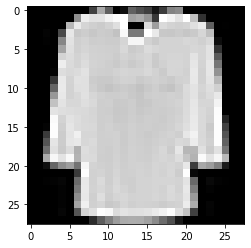

In [15]:
plt.imshow(xtest[145],cmap='gray')
plt.show()

In [16]:
prediction = model.predict(xtest[145].reshape(1,28,28))
prediction

array([[1.4264919e-01, 1.0147294e-18, 7.8020269e-01, 2.7770034e-06,
        2.8821090e-05, 2.2519902e-24, 7.7115826e-02, 2.6855335e-21,
        7.3342187e-07, 1.0873657e-36]], dtype=float32)

In [17]:
output = np.argmax(prediction)
cnames[output]

'Pullover'